In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/DataAnalyst.csv')

In [3]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

In [5]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')

In [7]:
df.describe()

,Unnamed: 0,Rating,Founded
count,2253.0000,2253.000000,2253.000000
mean,1126.0000,3.160630,1398.522858
std,650.5294,1.665228,901.929251
min,0.0000,-1.000000,-1.000000
25%,563.0000,3.100000,-1.000000
50%,1126.0000,3.600000,1979.000000
75%,1689.0000,4.000000,2002.000000
max,2252.0000,5.000000,2019.000000


In [8]:
df.isnull().sum()

,0
Unnamed: 0,0
Job Title,0
Salary Estimate,0
Job Description,0
Rating,0
Company Name,1
Location,0
Headquarters,0
Size,0
Founded,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [12]:
for col in ['Job Title', 'Type of ownership', 'Industry',
            'Sector']:
    print(df[col].value_counts().head())

Job Title
Data Analyst             405
Senior Data Analyst       90
Junior Data Analyst       30
Business Data Analyst     28
Sr. Data Analyst          21
Name: count, dtype: int64
Type of ownership
Company - Private                 1273
Company - Public                   452
-1                                 163
Nonprofit Organization             124
Subsidiary or Business Segment      89
Name: count, dtype: int64
Industry
-1                                  353
IT Services                         325
Staffing & Outsourcing              323
Health Care Services & Hospitals    151
Computer Hardware & Software        111
Name: count, dtype: int64
Sector
Information Technology    570
Business Services         524
-1                        353
Finance                   169
Health Care               151
Name: count, dtype: int64


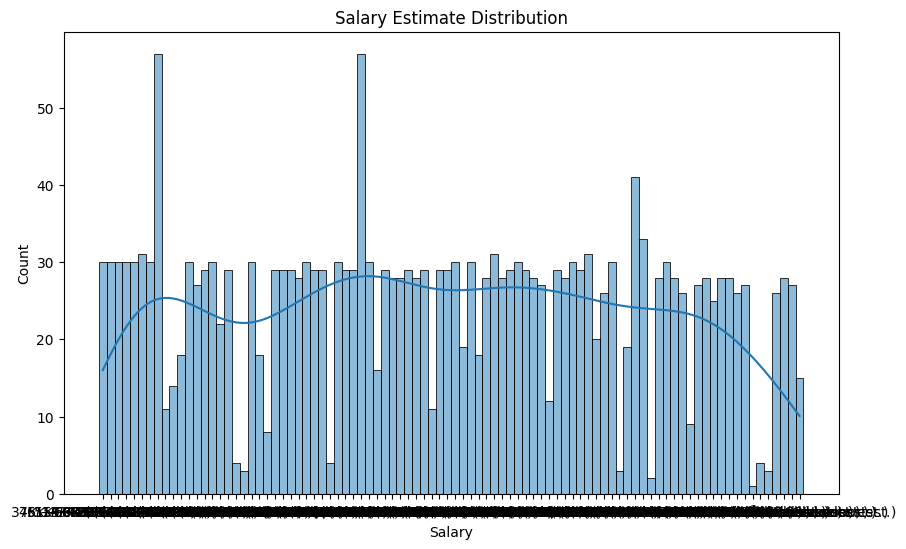

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary Estimate'], kde=True, bins=20)
plt.title("Salary Estimate Distribution")
plt.xlabel("Salary")
plt.show()

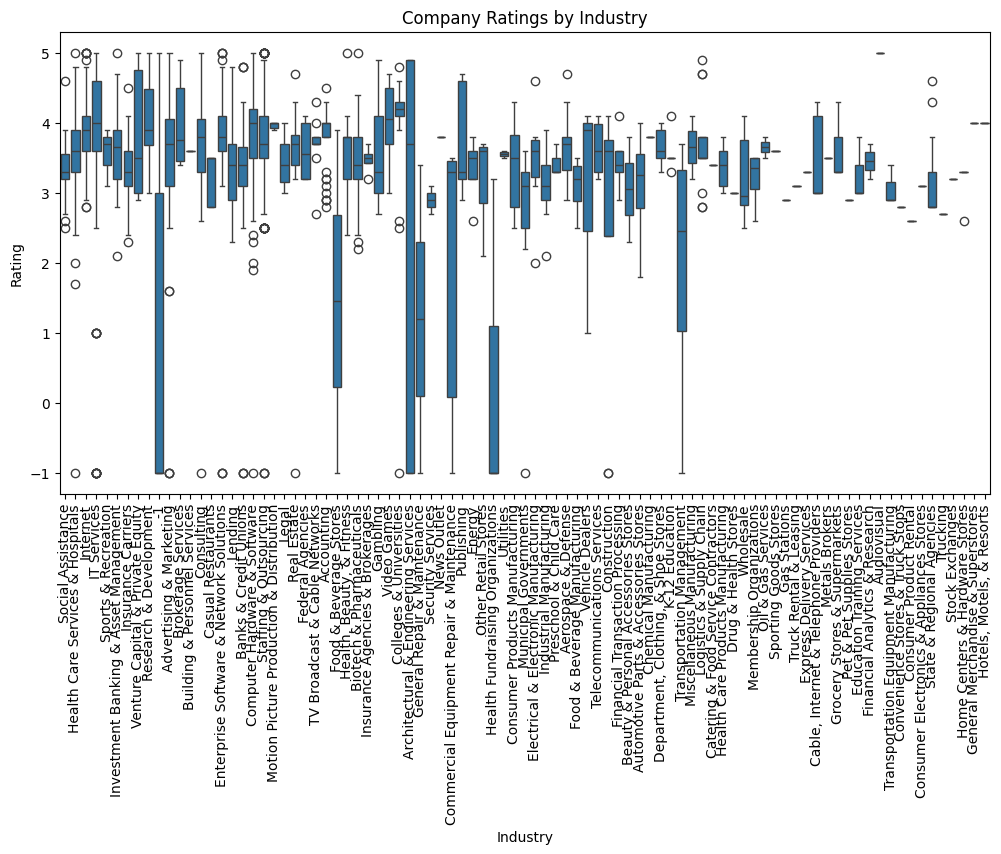

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Industry', y='Rating', data=df)
plt.xticks(rotation=90)
plt.title("Company Ratings by Industry")
plt.show()

In [22]:
df['Job Title'] = df['Job Title'].replace(['Sr. Data Analyst','sr. data analyst', 'Sr Data Analyst', 'sr dataanalyst','senior data analyst', 'Senior Data Analyst', 'Data Analyst III', 'data analyst iii', 'senior data analyst'],'Senior Data Analyst', regex=True)
df['Job Title'] = df['Job Title'].replace(['Data Analyst I', 'data analyst i', 'Data Analyst Junior', 'data analyst junior','Junior Data Analyst', 'Junior Data AnalystI', 'Junior Data Analystl'],'Junior Data Analyst', regex=True)
df['Job Title'] = df['Job Title'].replace(['Data Analyst II','data analyst ii', 'Middle Data Analyst'],'Middle Data Analyst', regex=True)

# Now, create the data_analyst_jobs DataFrame
data_analyst_jobs = df[df['Job Title'].str.contains('Data Analyst', case=False, na=False)].copy()

In [24]:
data_analyst_jobs[['MinSalary', 'MaxSalary']] = data_analyst_jobs['Salary Estimate'].str.extract(r'\$(\d+)K-\$(\d+)K')
data_analyst_jobs['MinSalary'] = pd.to_numeric(data_analyst_jobs['MinSalary'])
data_analyst_jobs['MaxSalary'] = pd.to_numeric(data_analyst_jobs['MaxSalary'])

In [26]:
data_analyst_jobs['MinSalary'] = data_analyst_jobs['MinSalary'].astype(float)
data_analyst_jobs['MaxSalary'] = data_analyst_jobs['MaxSalary'].astype(float)
data_analyst_jobs['average_salary'] = (data_analyst_jobs['MaxSalary'] + data_analyst_jobs['MinSalary']) / 2
#drop salary estimate(unuseful column)
data_analyst_jobs.drop(['Salary Estimate'], axis=1, inplace=True)
#data_analyst_jobs.drop(['MinSalary','MaxSalary'], axis=1, inplace=True)

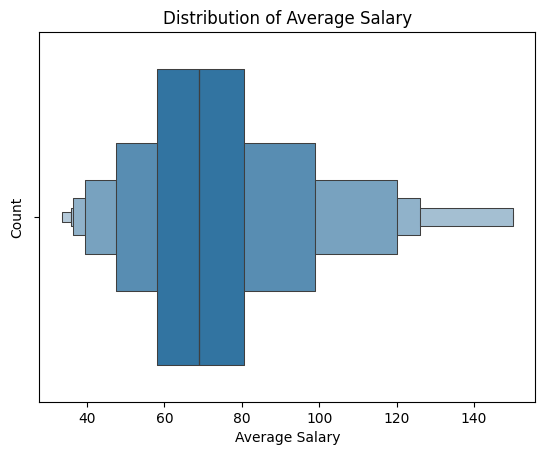

In [27]:
sns.boxenplot(data=data_analyst_jobs, x='average_salary')
plt.xlabel('Average Salary')
plt.ylabel('Count')
plt.title('Distribution of Average Salary')
plt.show()

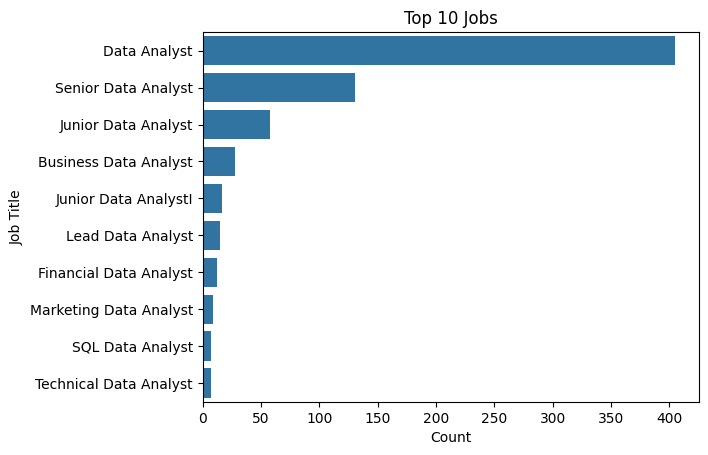

In [29]:
top_jobs = data_analyst_jobs['Job Title'].value_counts().head(10)
sns.barplot(x=top_jobs.values, y=top_jobs.index)
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Top 10 Jobs')
plt.show()

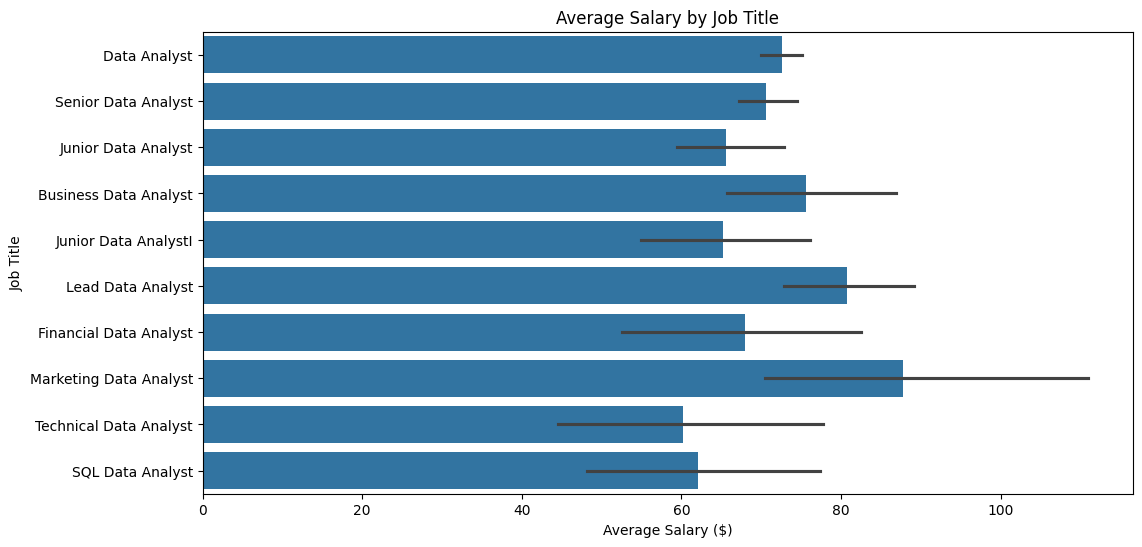

In [32]:
data_analyst_jobs_sorted = data_analyst_jobs.sort_values(by='average_salary',ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='average_salary', y='Job Title',
data=data_analyst_jobs_sorted, orient='h',
order=data_analyst_jobs_sorted['Job Title'].value_counts().head(10).index)
plt.xlabel('Average Salary ($)')
plt.ylabel('Job Title')
plt.title('Average Salary by Job Title')
plt.show()

In [35]:
job_location =data_analyst_jobs.groupby('Location')["average_salary"].mean().reset_index()
top_10 = job_location.sort_values(by = "average_salary",ascending=False).head(10)

In [38]:
import plotly.express as px

fig = px.bar(top_10, x='average_salary', y='Location',orientation='h', title='Salary Trends by Location', color ="Location")
fig.update_layout(xaxis_title='AVG Salary (USD)',yaxis_title='Location', showlegend = False)
fig.show()

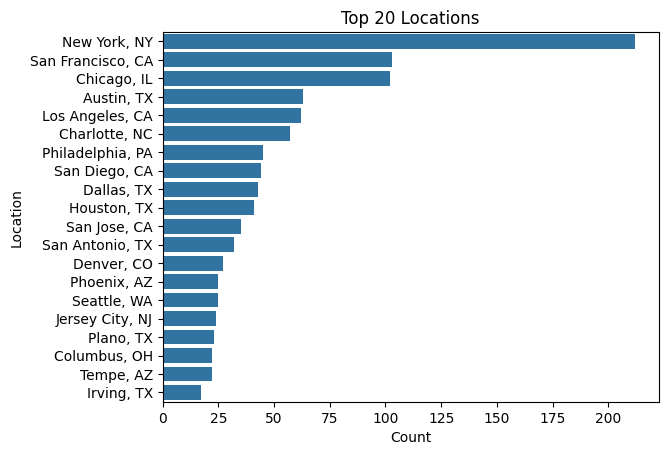

In [40]:
top_locations = data_analyst_jobs['Location'].value_counts().head(20)
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.xlabel('Count')
plt.ylabel('Location')
plt.title('Top 20 Locations')
plt.show()

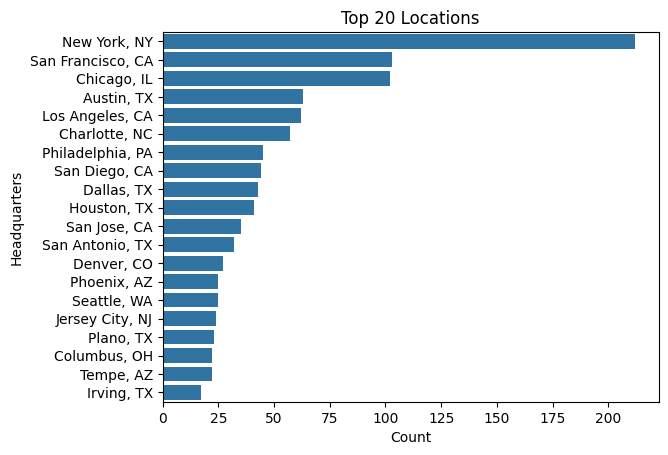

In [42]:
top_headquarters = data_analyst_jobs['Headquarters'].value_counts().head(20)
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.xlabel('Count')
plt.ylabel('Headquarters')
plt.title('Top 20 Locations')
plt.show()

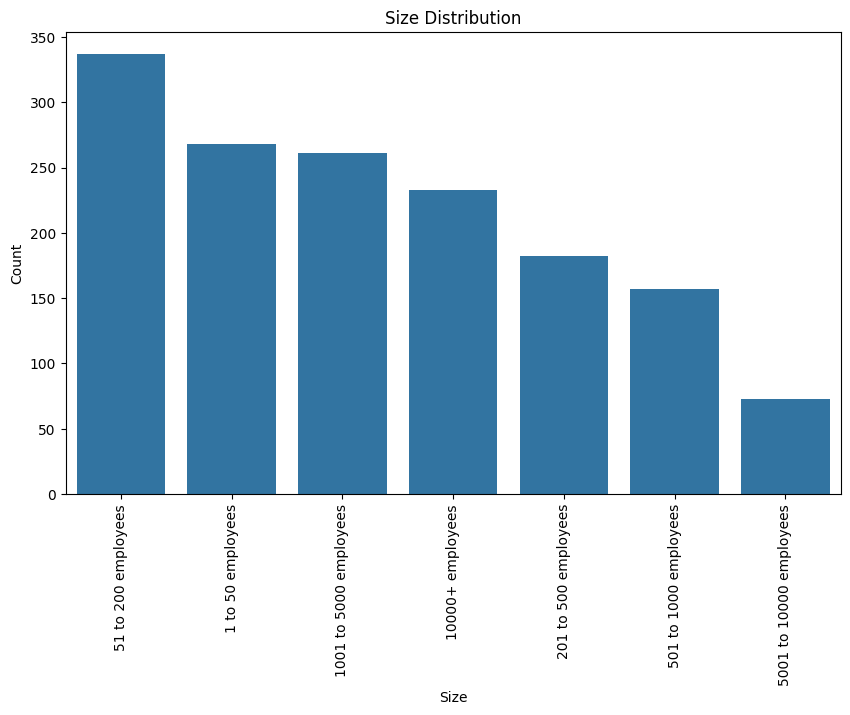

In [44]:
filtered_size = data_analyst_jobs[(data_analyst_jobs['Size'] !='-1') & (data_analyst_jobs['Size'] != 'Unknown')]
data_analyst_jobs_size = filtered_size['Size'].value_counts().head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=data_analyst_jobs_size.index,
y=data_analyst_jobs_size.values)
plt.xlabel('Size')
plt.ylabel('Count')
plt.title('Size Distribution')
plt.xticks(rotation=90)
plt.show()

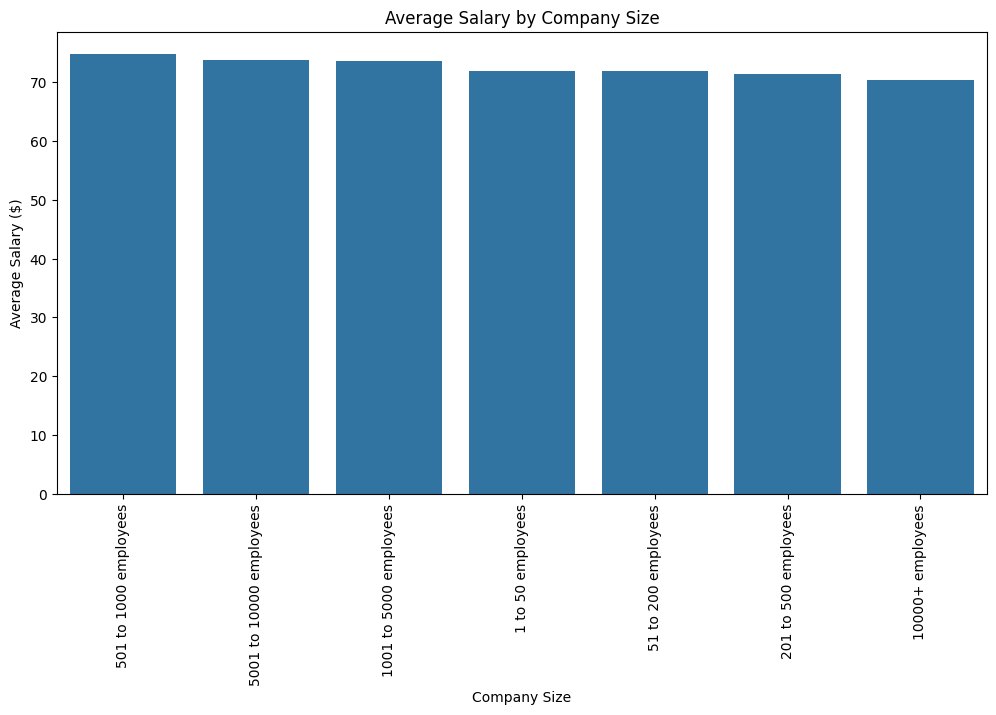

In [46]:
data_analyst_jobs_filtered = data_analyst_jobs[(data_analyst_jobs['Size'] != '-1') &(data_analyst_jobs['Size'] != 'Unknown')]
data_analyst_jobs_sizeXsalary = data_analyst_jobs_filtered.groupby('Size')['average_salary'].mean().reset_index()
# Sort the DataFrame by 'AverageSalary' in descending order
data_analyst_jobs_sizeXsalary = data_analyst_jobs_sizeXsalary.sort_values(by='average_salary',ascending=False)
# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Size', y='average_salary',
data=data_analyst_jobs_sizeXsalary)
plt.xlabel('Company Size')
plt.ylabel('Average Salary ($)')
plt.title('Average Salary by Company Size')
plt.xticks(rotation=90)
plt.show()

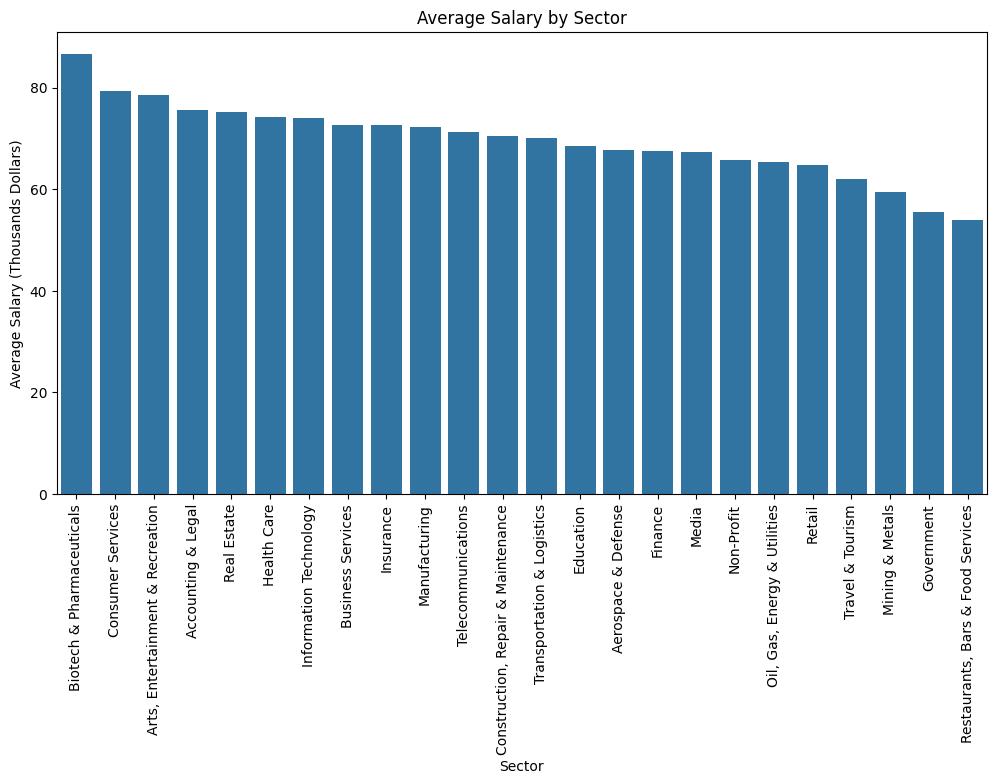

In [48]:
average_salary_by_sector = data_analyst_jobs[data_analyst_jobs['Sector'] !='-1'].groupby('Sector')['average_salary'].mean().reset_index()
average_salary_by_sector = average_salary_by_sector.sort_values(by='average_salary',ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Sector', y='average_salary',data=average_salary_by_sector)
plt.xticks(rotation=90)
plt.xlabel('Sector')
plt.ylabel('Average Salary (Thousands Dollars)')
plt.title('Average Salary by Sector')
plt.show()

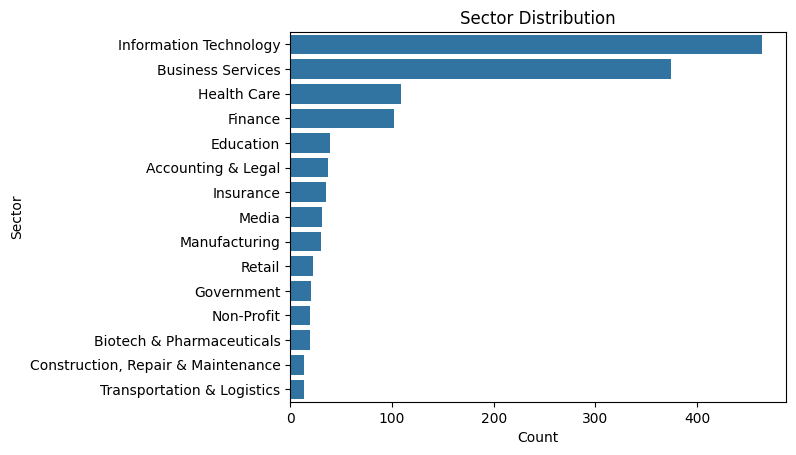

In [50]:
data_analyst_jobs_sector = data_analyst_jobs[data_analyst_jobs['Sector'] !='-1']['Sector'].value_counts().head(15)
sns.barplot(x=data_analyst_jobs_sector.values,
y=data_analyst_jobs_sector.index)
plt.xlabel('Count')
plt.ylabel('Sector')
plt.title('Sector Distribution')
plt.show()

In [51]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

    return df_results


def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.

    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')

    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)

    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)

    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')

    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()

    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')


● Analyze trends in data analyst job postings.

● Predict salary ranges for given job attributes.

● Provide insights into company ratings, locations, and industry trends